# <center> <span style="font-size:35px;"> Heart Attack </span> </center>
Heart Attack (myocardial infarction) happens when one or more areas of the heart muscle don't get enough oxygen. This happens when blood flow to the heart muscle is blocked.

## Symptoms of Heart Attack:

* Severe pressure, fullness, squeezing, pain, or discomfort in the center of the chest that lasts for more than a few minutes
* Pain or discomfort that spreads to the shoulders, neck, arms, or jaw
* Chest pain that gets worse
* Chest pain that doesn't get better with rest
* Chest pain that happens along with any of these symptoms:
    1. Sweating, cool, clammy skin, or paleness
    2.Shortness of breath
    3.Nausea or vomiting
    4.Dizziness or fainting
    5.Unexplained weakness or fatigue
    6.Rapid or irregular pulse
    

Cardiovascular diseases (CVDs) are the leading cause of death globally. An estimated 17.9 million people died from CVDs in 2019, 
representing 32% of all global deaths. Of these deaths, 85% were due to heart attack and stroke.
Well it is important to identify risk of heart attack in patients, and treat them with proper medicine to prolong their life.

We will use the heart attack dataset containing following parameters, to predict the chances of heart attack in patients:

* Age : Age of the patient
* Sex : Sex of the patient
* exang: exercise induced angina (1 = yes; 0 = no)
* ca: number of major vessels (0-3)
* cp : Chest Pain type chest pain type
    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic
* trtbps : resting blood pressure (in mm Hg)
* chol : cholestoral in mg/dl fetched via BMI sensor
* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* rest_ecg : resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach : maximum heart rate achieved
* target : 0= less chance of heart attack 1= more chance of heart attack

In [157]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
#import the dataset
df = pd.read_csv('heart.csv')

In [159]:
df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp   
0   63    1   3     145   233    1        0       150     0      2.3    0  \
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [160]:
df.describe()

age         sex          cp      trtbps        chol         fbs   
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  \
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa   
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  \
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

            thall      output  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [162]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

# EDA

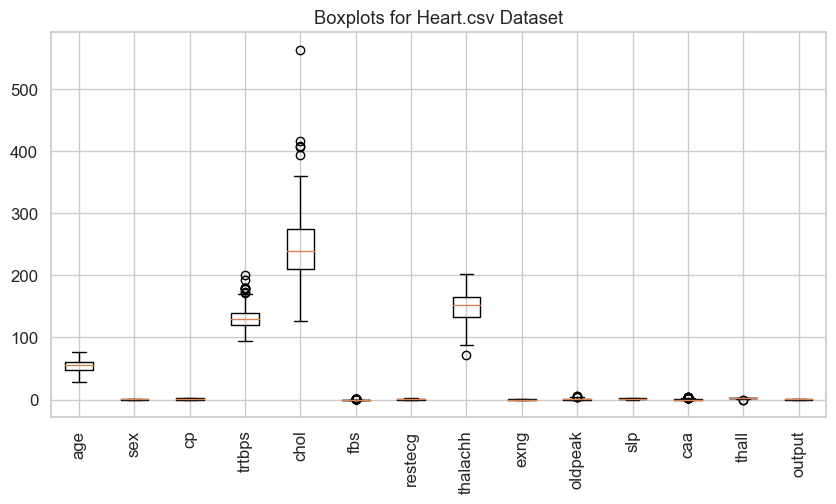

In [163]:
fig, ax = plt.subplots(figsize=(10,5))

# create a boxplot for each numerical column
bp = ax.boxplot(df.select_dtypes(include=['int64', 'float64']))

# set title and labels
ax.set_title('Boxplots for Heart.csv Dataset')
ax.set_xticklabels(df.select_dtypes(include=['int64', 'float64']).columns, rotation=90)

plt.show()

In [164]:
z_scores = np.abs((df.select_dtypes(include=['int64', 'float64']) - df.select_dtypes(include=['int64', 'float64']).mean()) / df.select_dtypes(include=['int64', 'float64']).std())

# remove rows with any Z-score greater than 3
df_clean = df[(z_scores < 3).all(axis=1)]

# display the cleaned dataset
print(df_clean)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp   
0     63    1   3     145   233    1        0       150     0      2.3    0  \
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  

<Axes: xlabel='output', ylabel='count'>

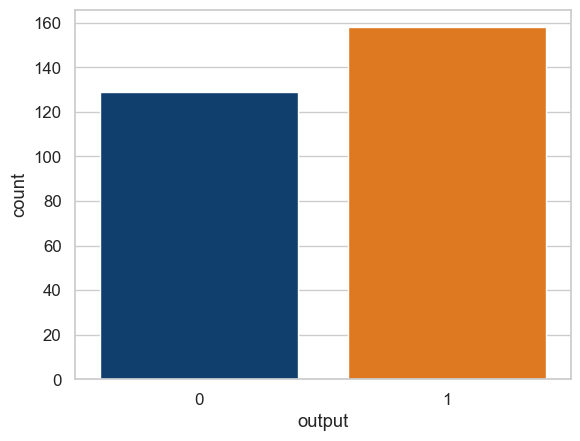

In [165]:
df=df_clean
sns.set(style = 'whitegrid', font_scale = 1.1)
sns.countplot(x='output', data=df, palette=["#003F7D", "#FD7702"])


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 287 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       287 non-null    int64  
 1   sex       287 non-null    int64  
 2   cp        287 non-null    int64  
 3   trtbps    287 non-null    int64  
 4   chol      287 non-null    int64  
 5   fbs       287 non-null    int64  
 6   restecg   287 non-null    int64  
 7   thalachh  287 non-null    int64  
 8   exng      287 non-null    int64  
 9   oldpeak   287 non-null    float64
 10  slp       287 non-null    int64  
 11  caa       287 non-null    int64  
 12  thall     287 non-null    int64  
 13  output    287 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.6 KB


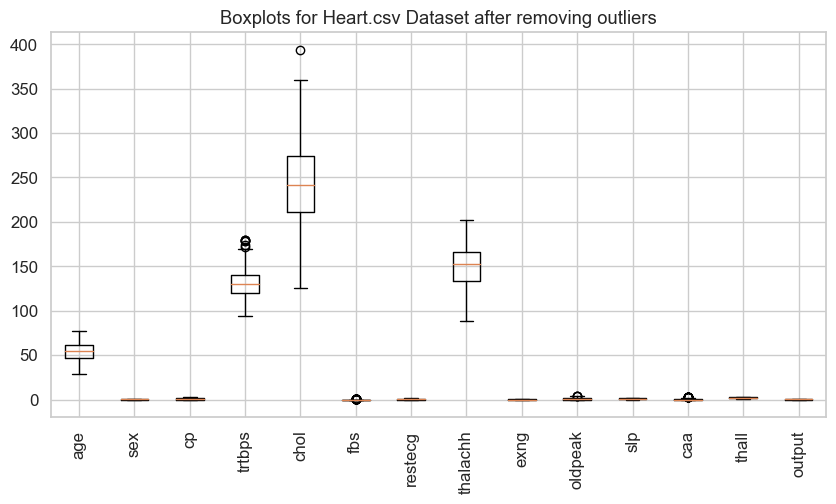

In [167]:
fig, ax = plt.subplots(figsize=(10,5))

# create a boxplot for each numerical column
bp = ax.boxplot(df.select_dtypes(include=['int64', 'float64']))

# set title and labels
ax.set_title('Boxplots for Heart.csv Dataset after removing outliers')
ax.set_xticklabels(df.select_dtypes(include=['int64', 'float64']).columns, rotation=90)

plt.show()

In [168]:
df['output'].value_counts()

output
1    158
0    129
Name: count, dtype: int64

As we can see the target variable is not unevenly distributed, so we can use accuracy as the metric for model performance.

In [169]:

df['range'] = pd.cut(df.age, [0, 10, 20, 30, 40, 50, 60 ,70, 80])
df['M/F'] = df['sex'].apply(lambda x : 'male' if x == 1 else 'female')
df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp   
0   63    1   3     145   233    1        0       150     0      2.3    0  \
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output     range     M/F  
0    0      1       1  (60, 70]    male  
1    0      2       1  (30, 40]    male  
2    0      2       1  (40, 50]  female  
3    0      2       1  (50, 60]    male  
4    0      2       1  (50, 60]  female

<Axes: xlabel='M/F', ylabel='count'>

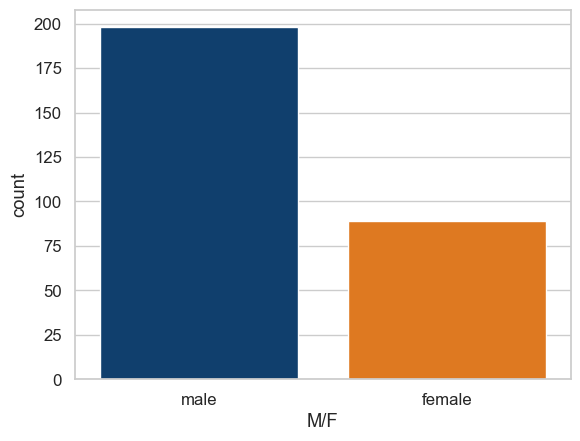

In [170]:
sns.set(style = 'whitegrid' , font_scale = 1.1)
sns.countplot(x='M/F', data=df, palette=["#003F7D", "#FD7702"])

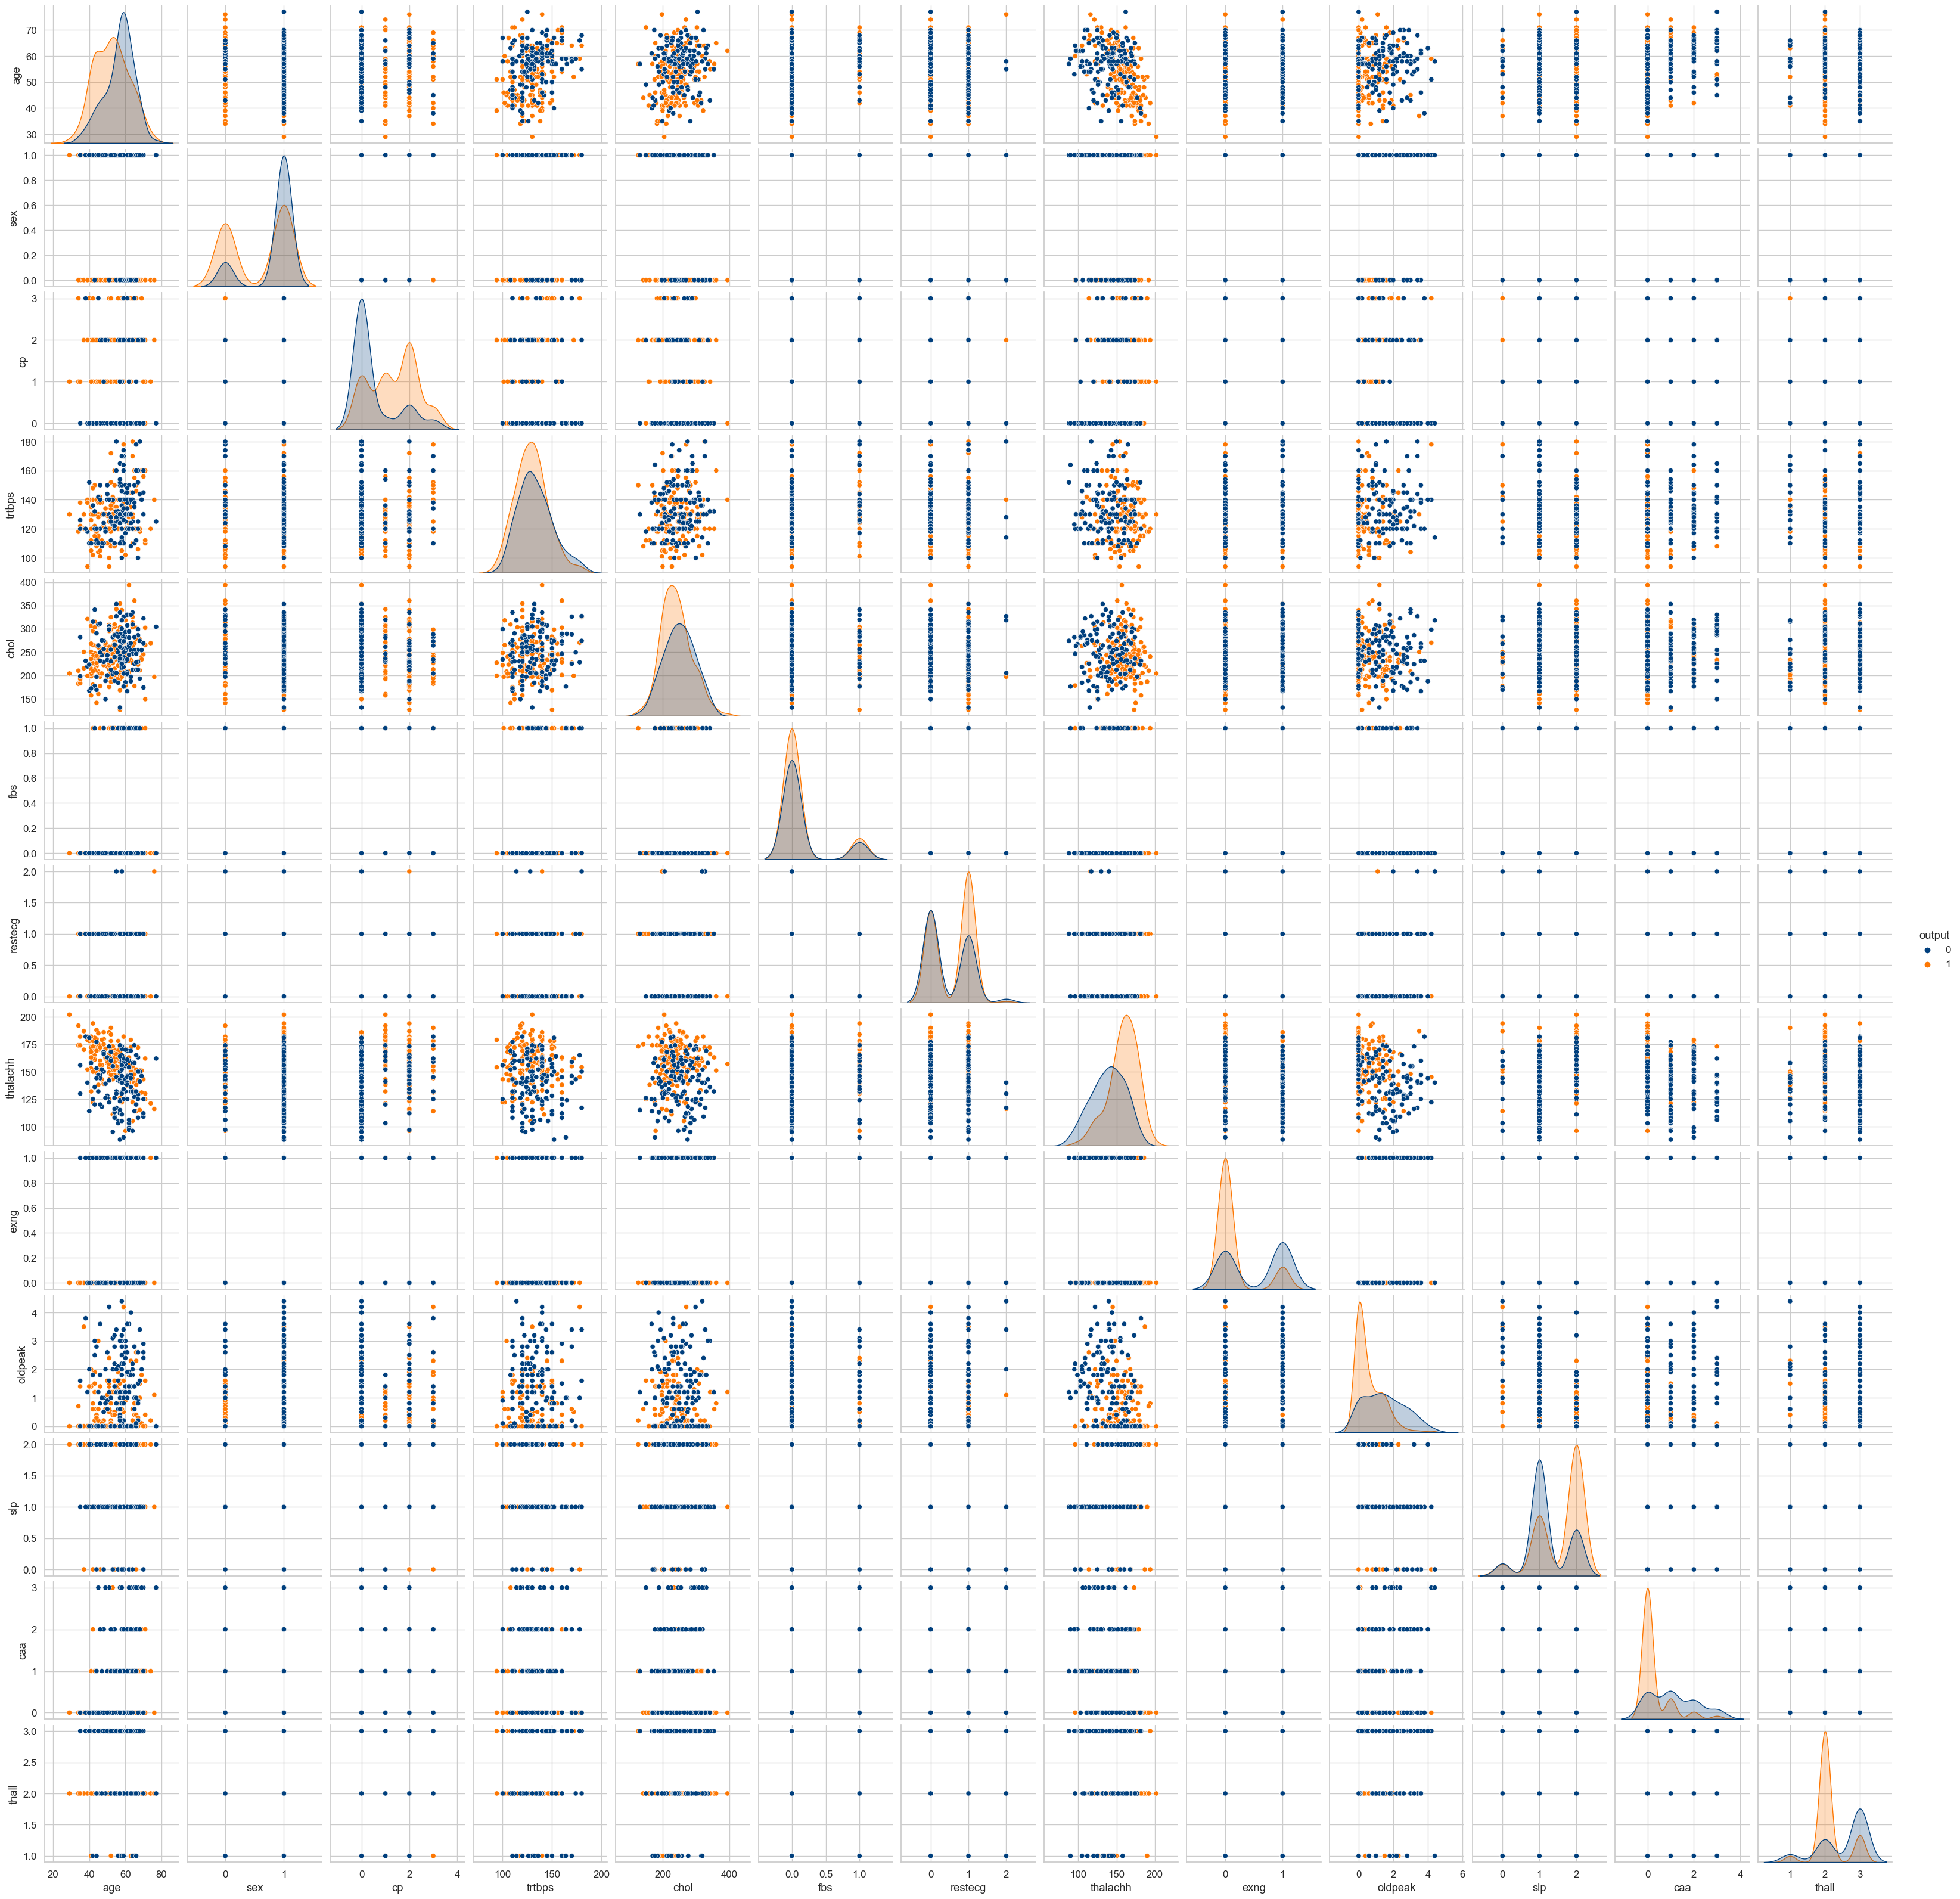

In [171]:
# plot pairplot for df
sns.pairplot(df, hue='output', palette=["#003F7D", "#FD7702"])
    

In [172]:
df['M/F'].value_counts()

M/F
male      198
female     89
Name: count, dtype: int64

The dataset is unevenly distributed in terms of male-female ratio.

<Axes: xlabel='range', ylabel='count'>

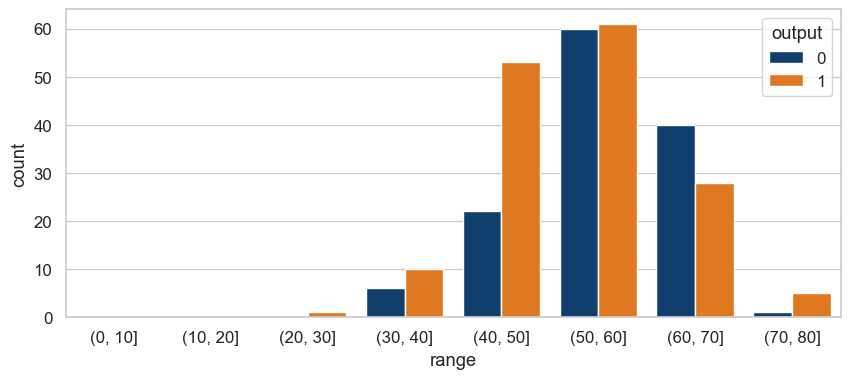

In [173]:
#Age vs output

plt.figure(figsize=(10, 4))
sns.countplot(x='range', data = df, hue='output', palette=["#003F7D", "#FD7702"])

People in the age range of 50-60 have higher chances of heart attack.

<Axes: xlabel='M/F', ylabel='count'>

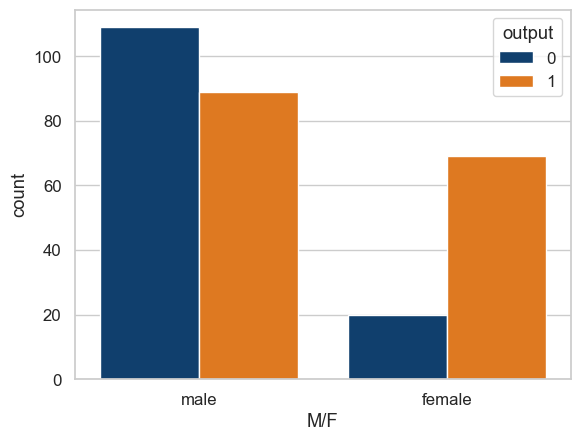

In [174]:
#Sex vs Ouput
sns.countplot(x='M/F', data = df, hue = 'output', palette=["#003F7D", "#FD7702"])

In [175]:
df.groupby(['M/F', 'output'])['output'].count()

M/F     output
female  0          20
        1          69
male    0         109
        1          89
Name: output, dtype: int64

As we can see from the above bar chart, females have more chances of heart attack than compared to male

In [176]:
#age vs chestpain
#age vs resting_blood_pressure
#age vs cholestrol_in_mg/dl
#age vs fasting_blood_sugar
#age vs resting_electrocardiographic
#age vs maximum_heart_rate_acheived

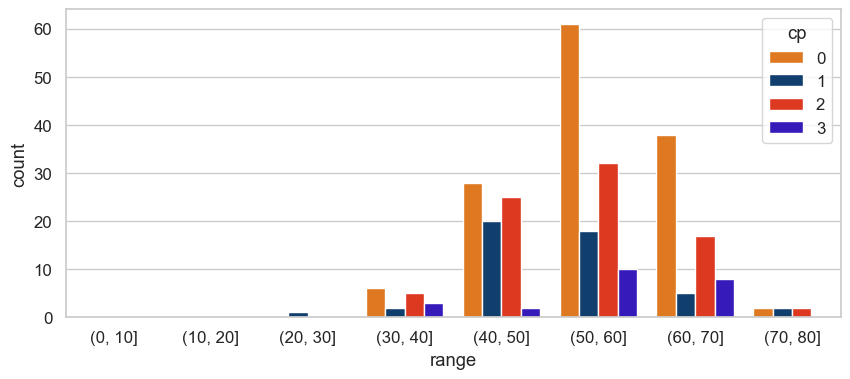

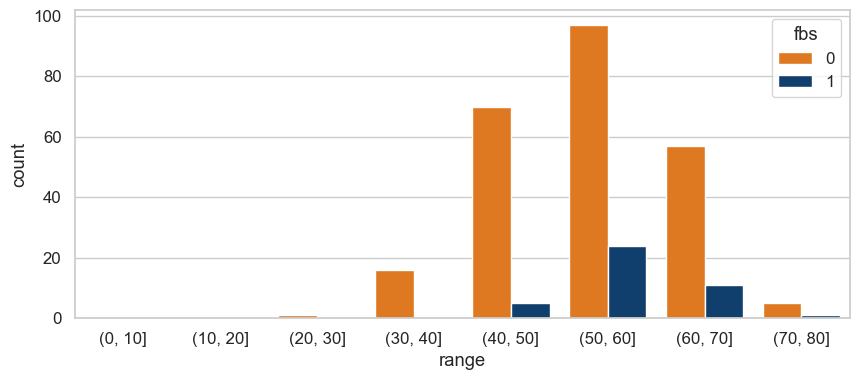

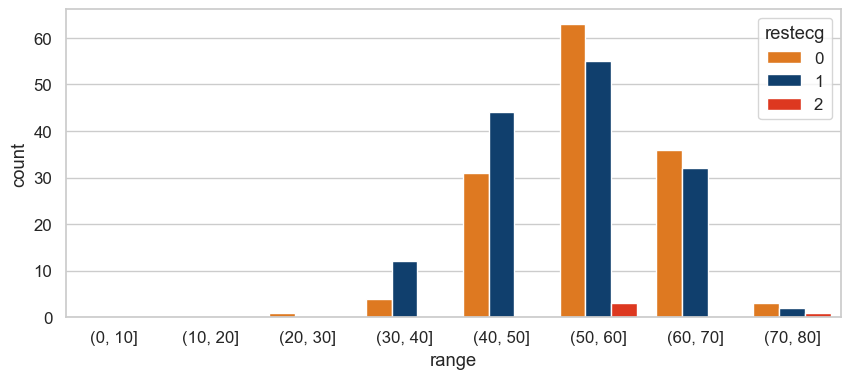

In [177]:
cat_attribute = ['cp','fbs', 'restecg']
num_attribute = ['trtbps', 'chol', 'thalachh']

for i in cat_attribute:
    plt.figure(figsize=(10, 4))
    sns.countplot(x='range', data = df, hue=i, palette=["#FD7702","#003F7D", '#FC2000', '#2400D4'])

As we can see from the above bar chart, people with the age of 50-60 have high chest pain(cp),fasting blood sugar(fbs) and resting electrocardiographic results(restecg).

C:\Users\jaswa\AppData\Local\Temp\ipykernel_20816\1861164336.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='range', y = i, data = df, palette=["#FD7702","#003F7D"])
C:\Users\jaswa\AppData\Local\Temp\ipykernel_20816\1861164336.py:3: UserWarning: 
The palette list has fewer values (2) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(x='range', y = i, data = df, palette=["#FD7702","#003F7D"])
C:\Users\jaswa\AppData\Local\Temp\ipykernel_20816\1861164336.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='range', y = i, data = df, palette=["#FD7702","#003F7D"])
C:\Users\jaswa\AppData\Local\Temp\ipykernel_20816\1861164336.py:3: UserWarning: 
The palette list has fewer values (2) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(x='range', y = i, data = df, palette=["#FD7702","#003F7D"])
C:\Users\jaswa\AppData\Local\T

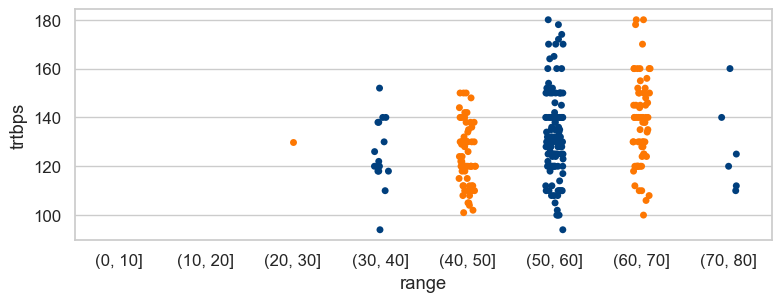

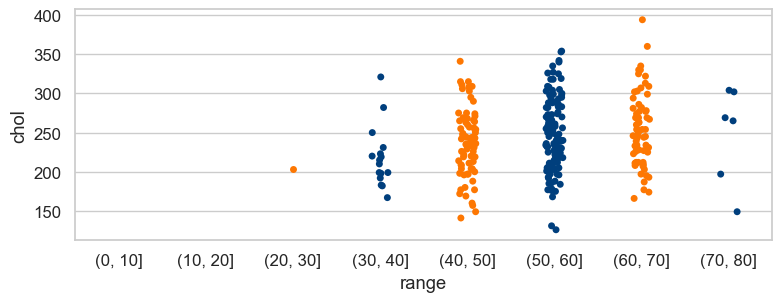

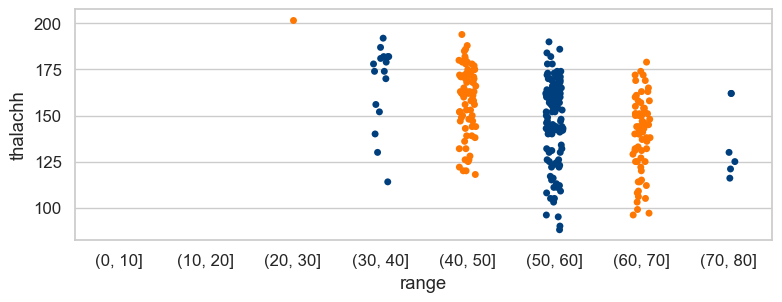

In [178]:
for i in num_attribute:
    plt.figure(figsize=(9, 3))
    sns.stripplot(x='range', y = i, data = df, palette=["#FD7702","#003F7D"])

In [179]:
df.groupby('range')[['trtbps', 'chol', 'thalachh']].count()

trtbps  chol  thalachh
range                           
(0, 10]        0     0         0
(10, 20]       0     0         0
(20, 30]       1     1         1
(30, 40]      16    16        16
(40, 50]      75    75        75
(50, 60]     121   121       121
(60, 70]      68    68        68
(70, 80]       6     6         6

Age group of 50-60 has more instances of people having high resting blood pressure(trtbps), cholestrol(chol) and heart rate(thalachh).                                           

In [180]:
#output vs age
#output vs chestpain
#output vs resting_blood_pressure
#output vs cholestrol_in_mg
#output vs fasting_blood_sugar
#output vs resting_electrocardigraphic
#output vs maximum_heart_rate_acheived
#output vs previous_peak
#output vs number_od_major_vessels

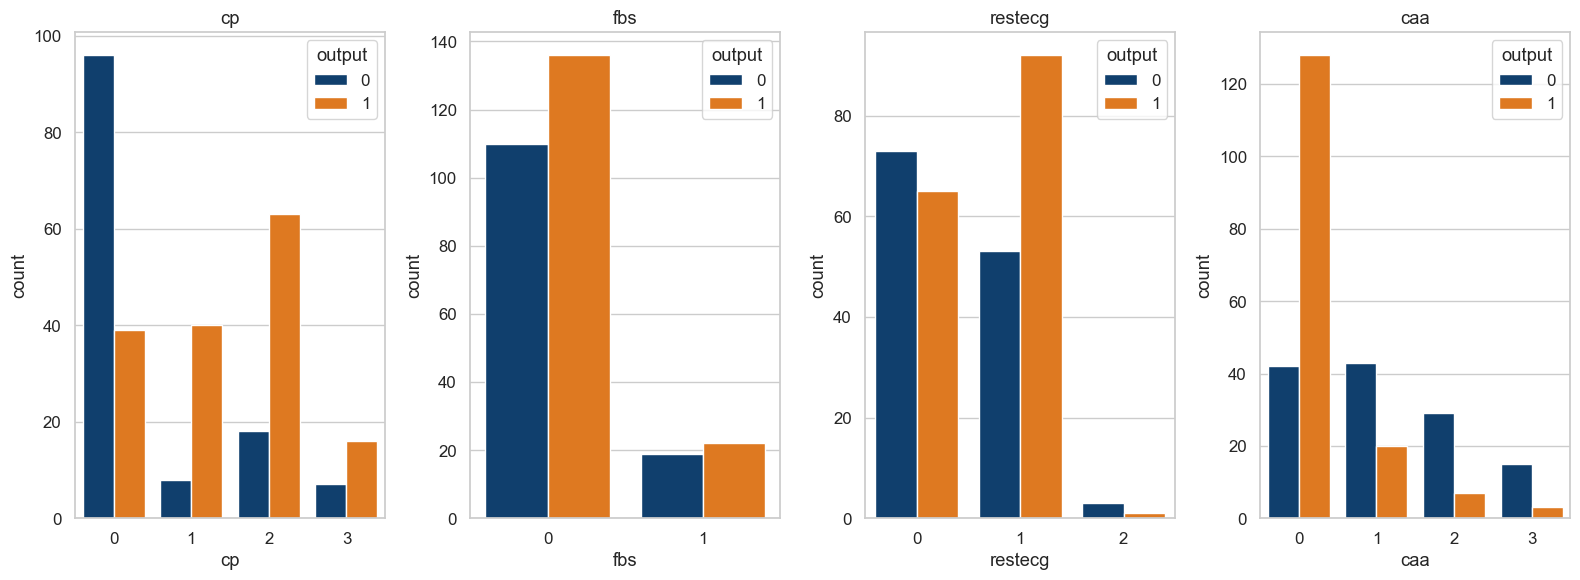

In [181]:
cat_attr = ['cp', 'fbs', 'restecg', 'caa']
num_attr = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

fig, axes = plt.subplots(nrows=1, ncols=len(cat_attr), figsize=(16, 6))

for i, cat_col in enumerate(cat_attr):
    sns.countplot(x=cat_col, data=df, hue='output', ax=axes[i], palette=["#003F7D", "#FD7702"])
    axes[i].set_title(cat_col)

plt.tight_layout()
plt.show()

* People having chest pain(cp) type 2 : atypical angina have high chances of heart attack.
* People with blood sugar less than 120 mg/dl have chances of heart attack.
* People with resting electrocardiographic results of value 1 : having ST-T wave abnormality have high chances of heart attack.
* People with caa type 0 have high chances of heart attack.

C:\Users\jaswa\AppData\Local\Temp\ipykernel_20816\1605738188.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='output', y=num_col, data=df, ax=axes.flatten()[i], palette=["#003F7D", "#FD7702"])
C:\Users\jaswa\AppData\Local\Temp\ipykernel_20816\1605738188.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='output', y=num_col, data=df, ax=axes.flatten()[i], palette=["#003F7D", "#FD7702"])
C:\Users\jaswa\AppData\Local\Temp\ipykernel_20816\1605738188.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='output', y=num_col, data=df, ax=axes.flatten()[i], palette=["#003F7D", "#FD7702"])
C:\Users\jaswa\AppData\Local\Temp\ipykernel_20816\1605738188.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='output', y=num_col, data=df, ax=axes.flatten()[i], palette=["#003F7D", "#FD7702"])
C:\Users\jaswa\AppData\Local\Temp\ip

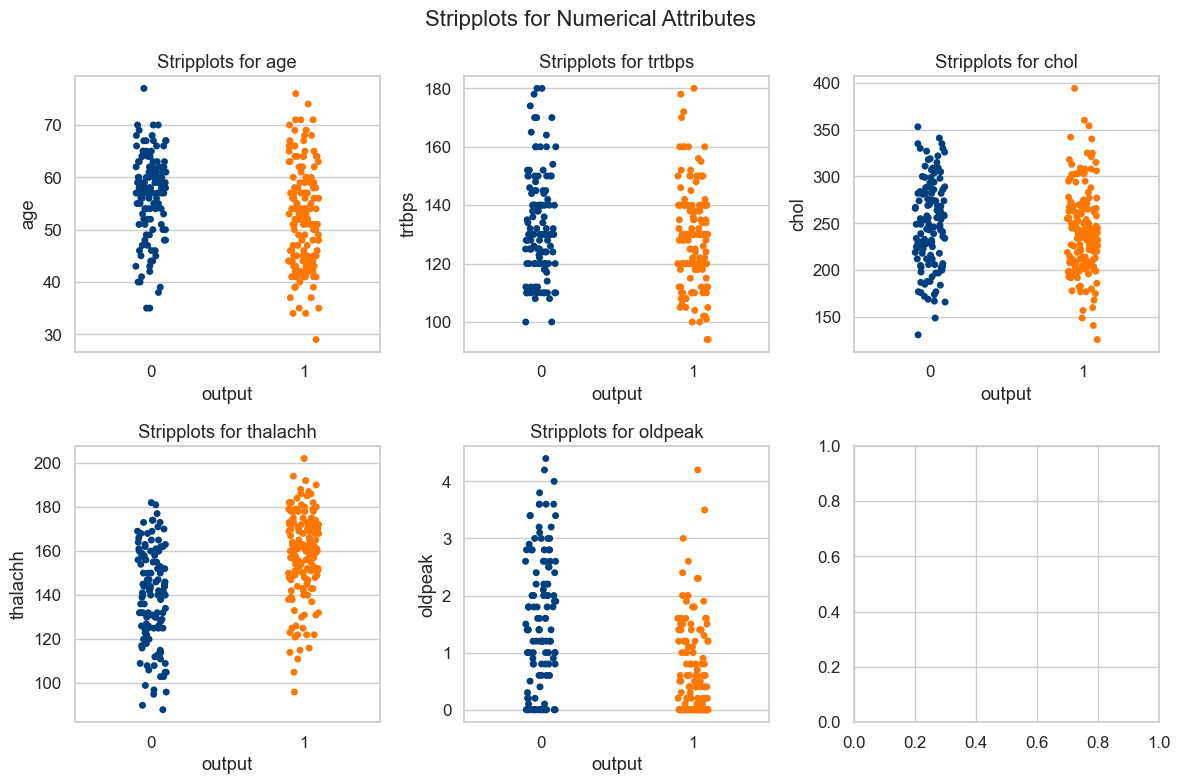

In [182]:
# Create subplot grid
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Loop over numerical attributes and create stripplots on each subplot
for i, num_col in enumerate(num_attr):
    sns.stripplot(x='output', y=num_col, data=df, ax=axes.flatten()[i], palette=["#003F7D", "#FD7702"])
    axes.flatten()[i].set_title('Stripplots for {}'.format(num_col))

# Set titles and axis labels for plot
fig.suptitle('Stripplots for Numerical Attributes', fontsize=16)

# Adjust spacing between subplots
plt.tight_layout()

# Display plot
plt.show()


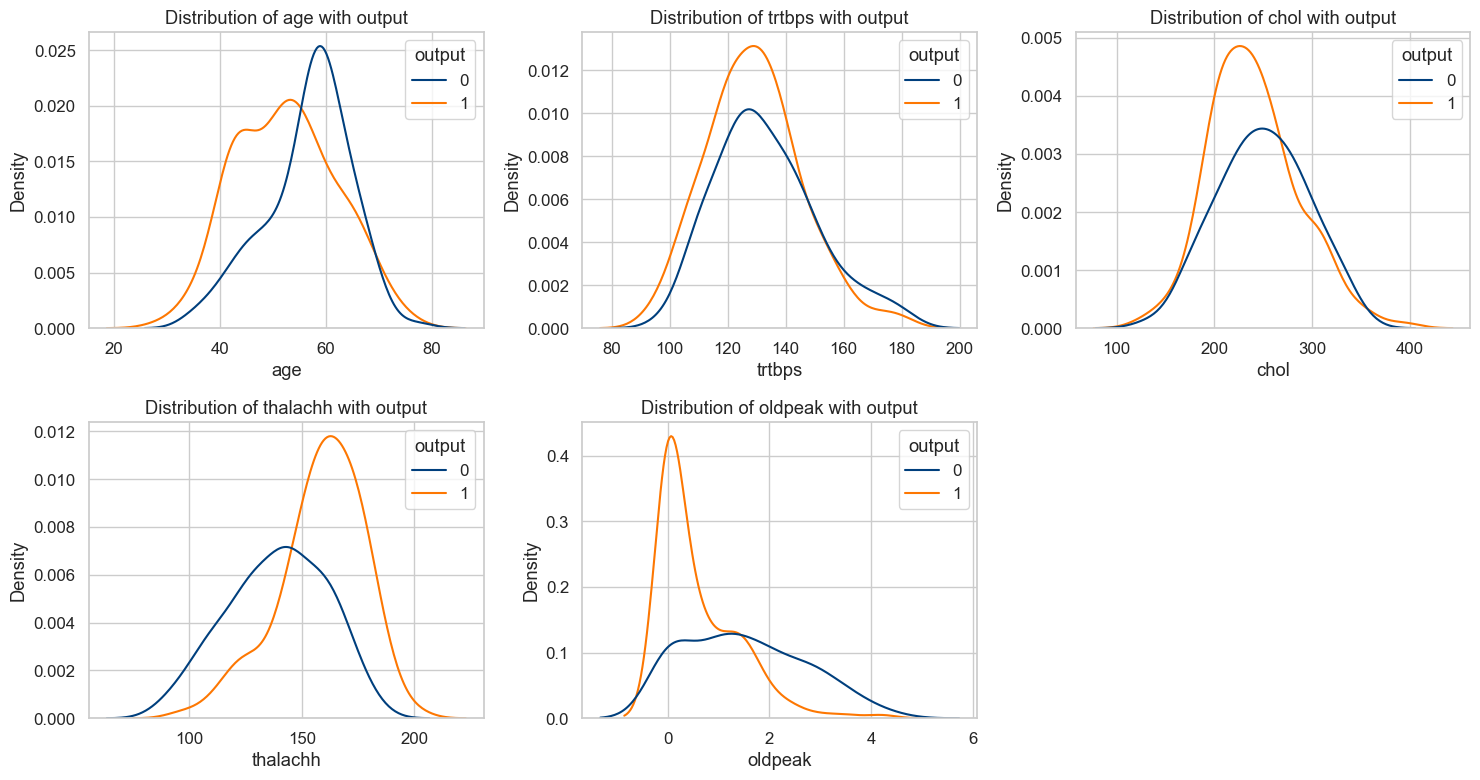

In [183]:
#Distribution of numeric features with the target variable.
num_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
target_var='output'
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Flatten axes for easy indexing
axes = axes.flatten()

# Loop over numerical features and plot distribution on each subplot
for i, feature in enumerate(num_features):
    sns.kdeplot(x=feature, hue=target_var, data=df, ax=axes[i], palette=["#003F7D", "#FD7702"])
    axes[i].set_title(f"Distribution of {feature} with {target_var}")

# Remove unused subplots
for i in range(len(num_features), len(axes)):
    axes[i].remove()

# Adjust spacing between subplots
fig.tight_layout()

# Display plot
plt.show()


In [184]:
#Correlation of features with respect to target variable
corr_matrix = df.iloc[:,:-2].corr()
corr_matrix['output'].sort_values(ascending=False)

output      1.000000
thalachh    0.431519
cp          0.408570
slp         0.323948
restecg     0.130079
fbs        -0.011438
chol       -0.099821
trtbps     -0.119281
age        -0.226750
sex        -0.302926
thall      -0.354579
oldpeak    -0.424443
exng       -0.429082
caa        -0.463258
Name: output, dtype: float64

<Axes: >

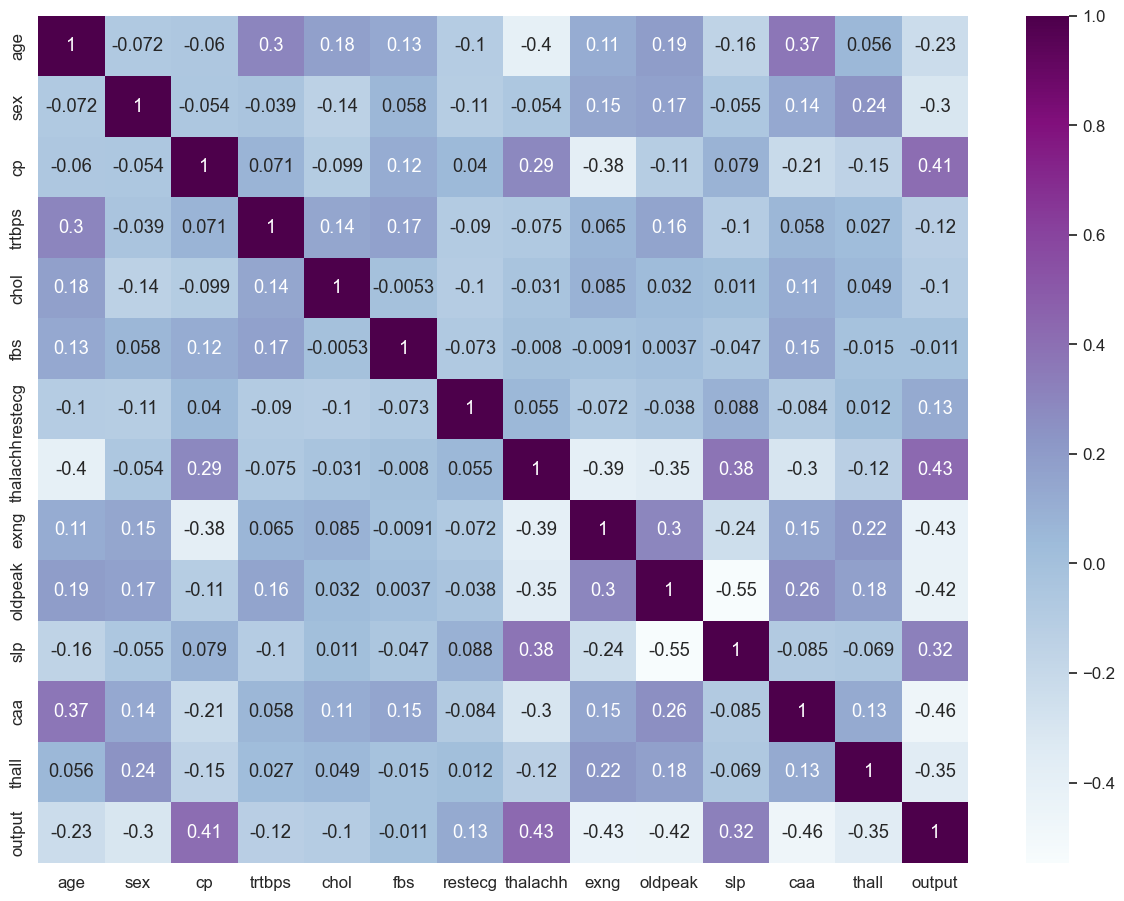

In [185]:
#heatmap
matrix = np.triu(corr_matrix)
plt.figure(figsize=(15, 11))
sns.heatmap(corr_matrix, annot=True, cmap = 'BuPu')

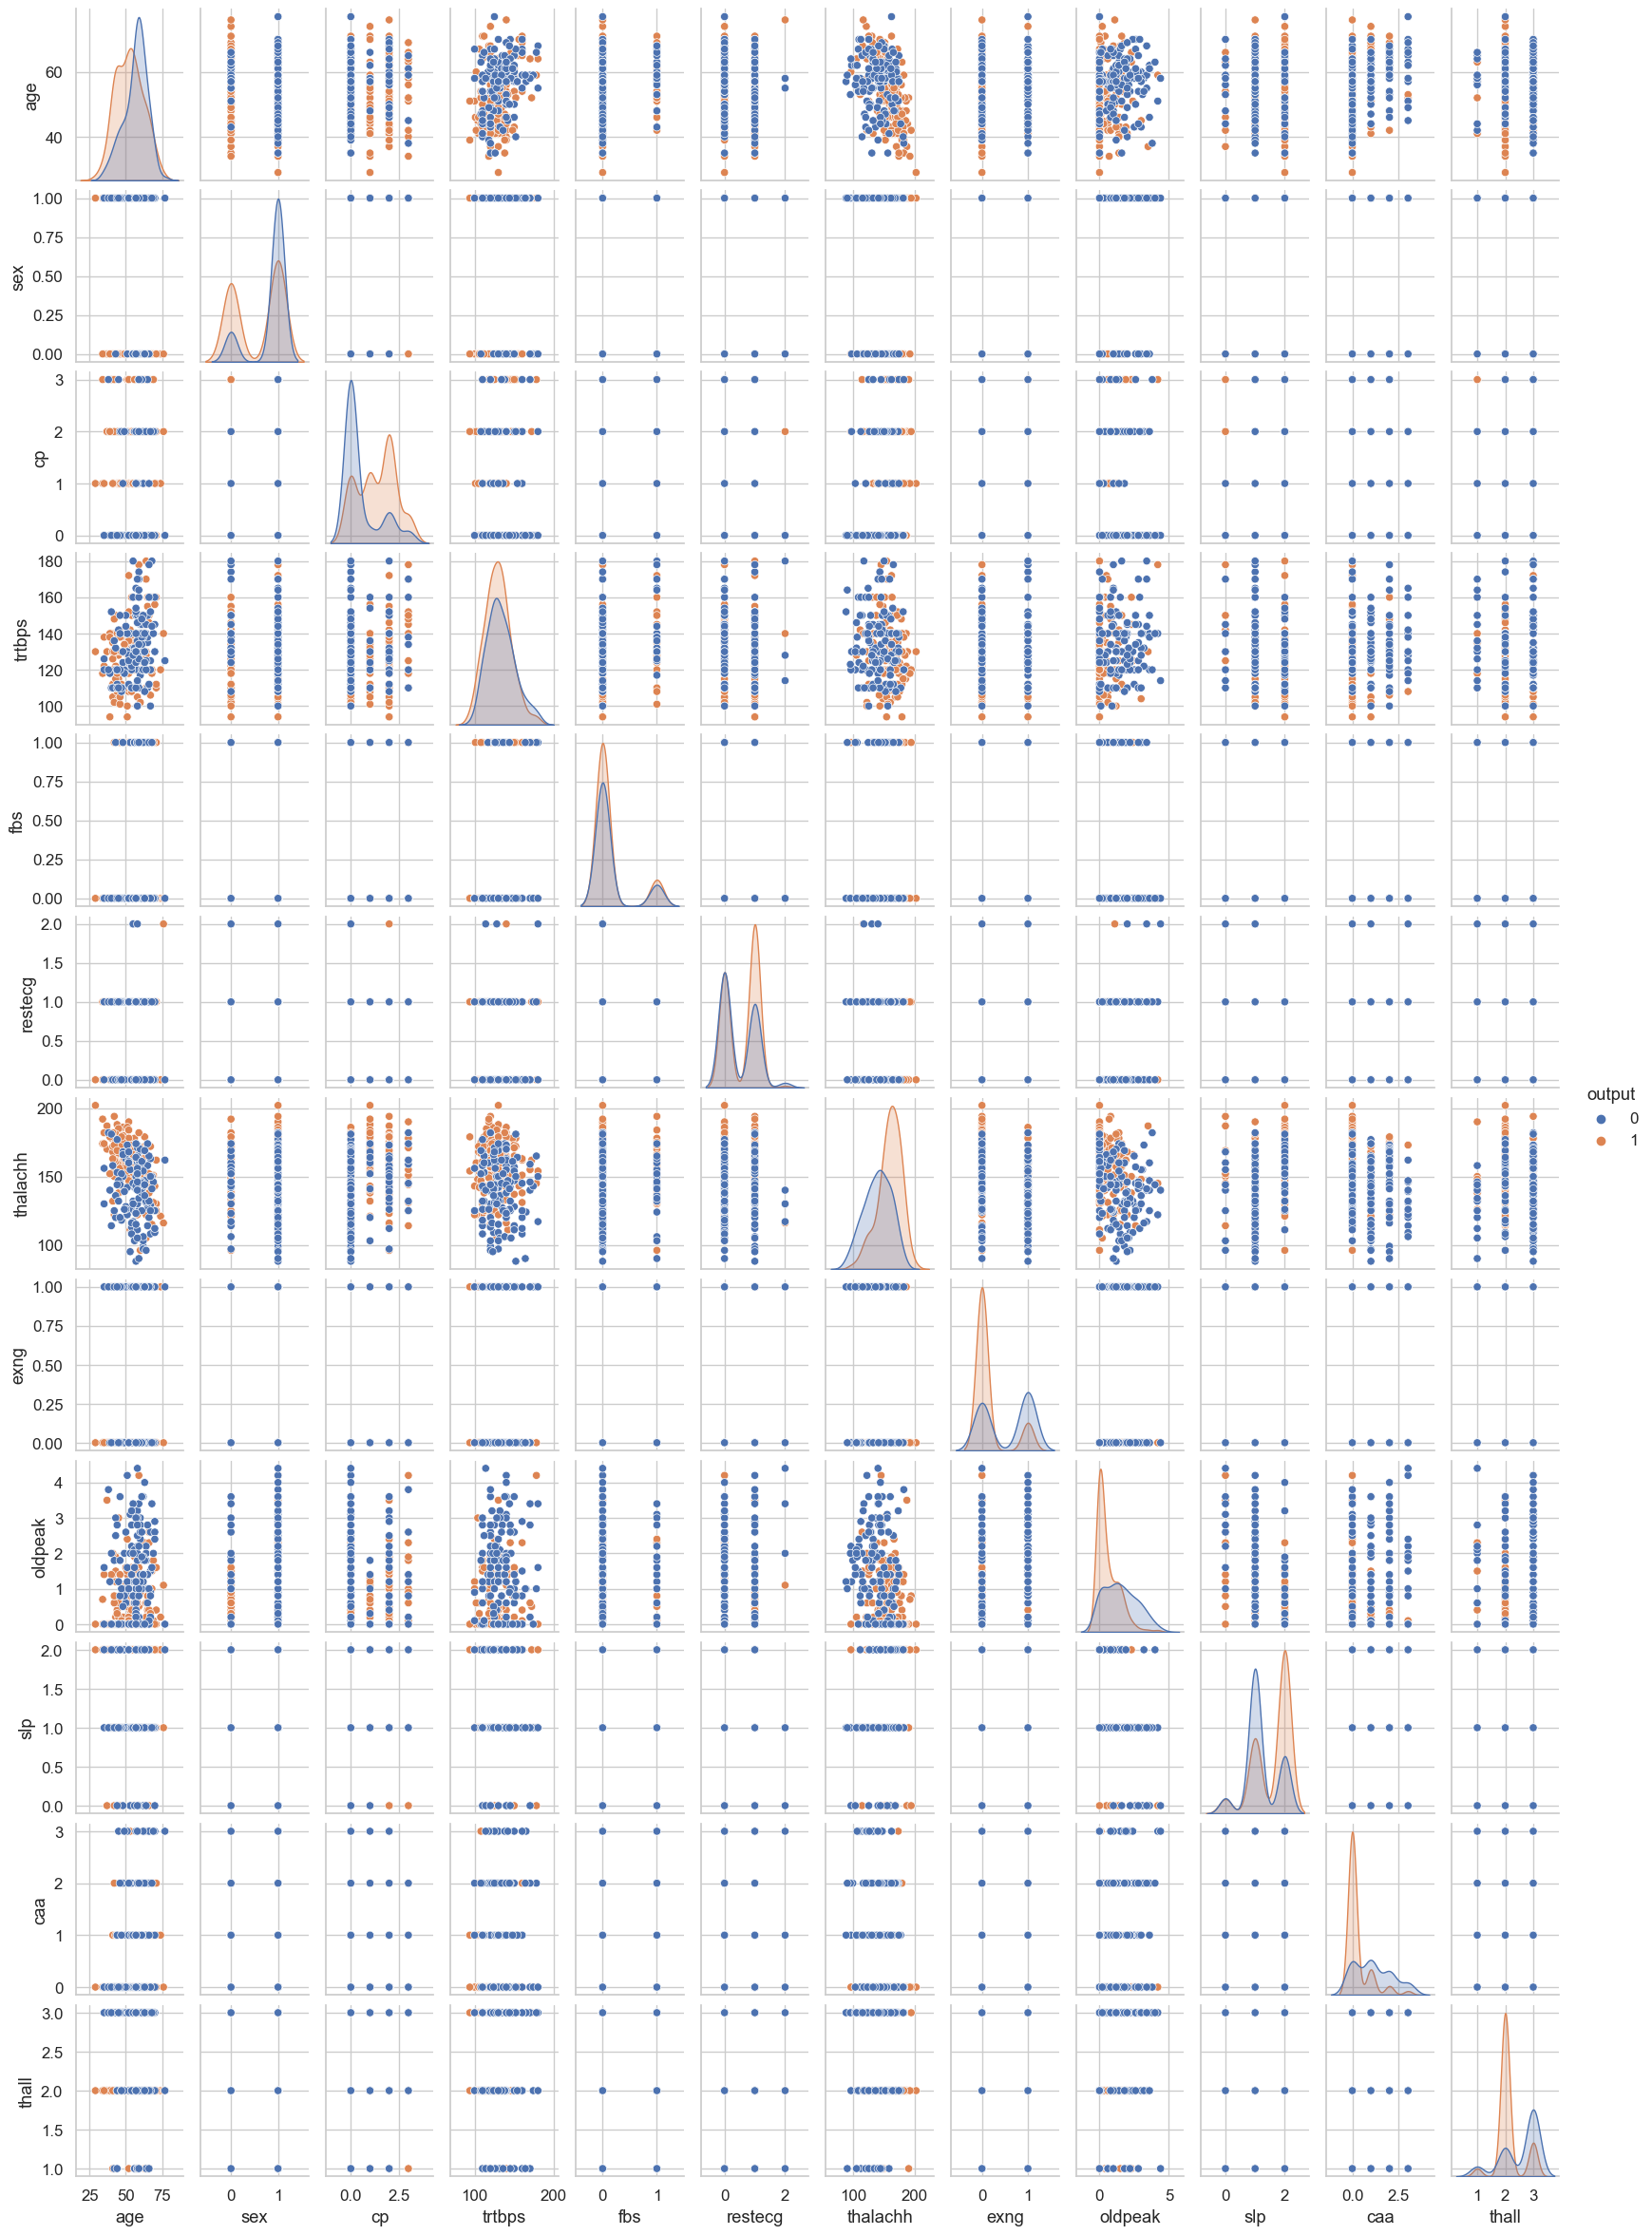

In [186]:
features = ['age', 'sex', 'cp', 'trtbps', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']
sns.pairplot(df[features], hue = 'output', height = 2, aspect=0.7)

# Model Building

In [187]:
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [188]:
df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp   
0   63    1   3     145   233    1        0       150     0      2.3    0  \
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output     range     M/F  
0    0      1       1  (60, 70]    male  
1    0      2       1  (30, 40]    male  
2    0      2       1  (40, 50]  female  
3    0      2       1  (50, 60]    male  
4    0      2       1  (50, 60]  female

In [189]:
#dropping the range and M/F columns added earlier
df = df.drop(['range', 'M/F'], axis = 1)
df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp   
0   63    1   3     145   233    1        0       150     0      2.3    0  \
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [190]:
X = df.drop('output', axis = 1)
y = df['output'].values

In [191]:
#spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

In [192]:
#support vector classification
svc_clf = SVC()
svc_clf.fit(X_train, y_train)
y_pred_svc = svc_clf.predict(X_test)


print(accuracy_score(y_test, y_pred_svc))
print('\n')
print(confusion_matrix(y_test, y_pred_svc))
print('\n')
print(classification_report(y_test, y_pred_svc))

0.75


[[18 13]
 [ 5 36]]


              precision    recall  f1-score   support

           0       0.78      0.58      0.67        31
           1       0.73      0.88      0.80        41

    accuracy                           0.75        72
   macro avg       0.76      0.73      0.73        72
weighted avg       0.76      0.75      0.74        72



<Axes: >

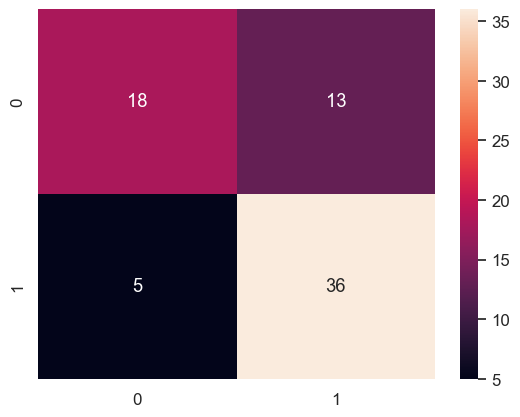

In [193]:
cm = confusion_matrix(y_test,y_pred_svc)
ax = plt.subplot()
sns.heatmap(cm,annot=True,ax = ax)

In [194]:
#random forest classifier
rfc_clf = RandomForestClassifier()
rfc_clf.fit(X_train, y_train)
y_pred_rfc = rfc_clf.predict(X_test)


print(accuracy_score(y_test, y_pred_rfc))
print('\n')
print(confusion_matrix(y_test, y_pred_rfc))
print('\n')
print(classification_report(y_test, y_pred_rfc))

0.8472222222222222


[[28  3]
 [ 8 33]]


              precision    recall  f1-score   support

           0       0.78      0.90      0.84        31
           1       0.92      0.80      0.86        41

    accuracy                           0.85        72
   macro avg       0.85      0.85      0.85        72
weighted avg       0.86      0.85      0.85        72



<Axes: >

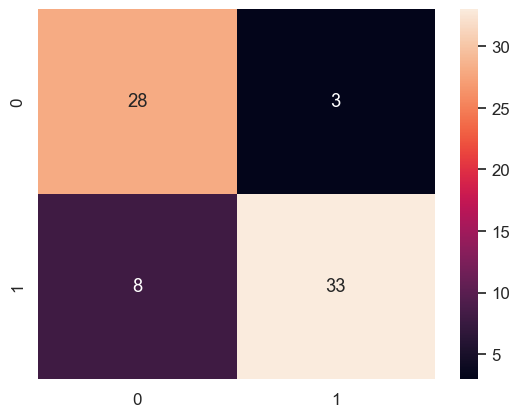

In [195]:
cm = confusion_matrix(y_test,y_pred_rfc)
ax = plt.subplot()
sns.heatmap(cm,annot=True,ax = ax)

In [196]:
DT = DecisionTreeClassifier(max_depth=7 , criterion='entropy')
DT.fit(X_train,y_train)
y_pred_DT = DT.predict(X_test)
accuracy_score(y_test,y_pred_DT)

0.7638888888888888

In [197]:
print(classification_report(y_test,y_pred_DT))

              precision    recall  f1-score   support

           0       0.67      0.90      0.77        31
           1       0.90      0.66      0.76        41

    accuracy                           0.76        72
   macro avg       0.78      0.78      0.76        72
weighted avg       0.80      0.76      0.76        72



<Axes: >

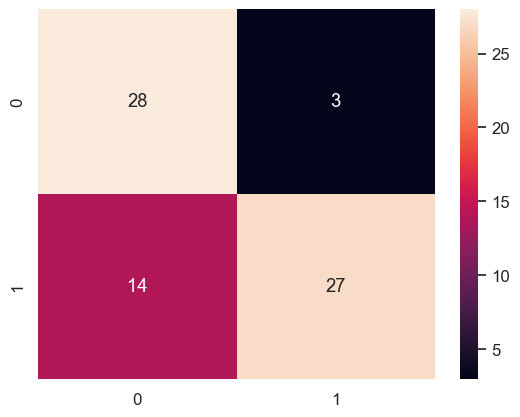

In [198]:
cm = confusion_matrix(y_test,y_pred_DT)
ax = plt.subplot()
sns.heatmap(cm,annot=True,ax = ax)

In [199]:
n = 5
KNN = KNeighborsClassifier(n)
KNN.fit(X_train, y_train)
  
# Calculate the accuracy of the model
print(KNN.score(X_test, y_test))
y_pred_KNN = KNN.predict(X_test)

0.6944444444444444


In [200]:
print(accuracy_score(y_test, y_pred_KNN))
print('\n')
print(confusion_matrix(y_test, y_pred_KNN))
print('\n')
print(classification_report(y_test, y_pred_KNN))

0.6944444444444444


[[23  8]
 [14 27]]


              precision    recall  f1-score   support

           0       0.62      0.74      0.68        31
           1       0.77      0.66      0.71        41

    accuracy                           0.69        72
   macro avg       0.70      0.70      0.69        72
weighted avg       0.71      0.69      0.70        72



<Axes: >

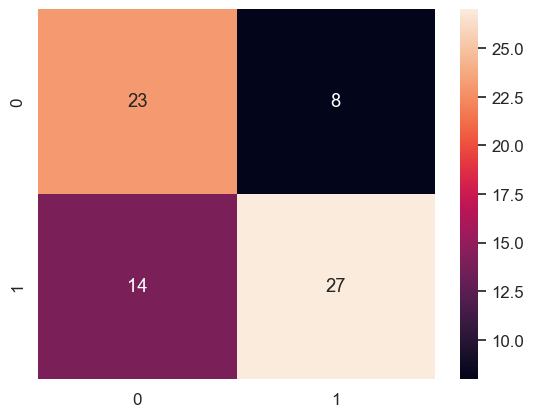

In [201]:
cm = confusion_matrix(y_test,y_pred_KNN)
ax = plt.subplot()
sns.heatmap(cm,annot=True,ax = ax)

In [202]:
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_xgb))
print('\n')
print(confusion_matrix(y_test, y_pred_xgb))
print('\n')
print(classification_report(y_test, y_pred_xgb))

0.8194444444444444


[[28  3]
 [10 31]]


              precision    recall  f1-score   support

           0       0.74      0.90      0.81        31
           1       0.91      0.76      0.83        41

    accuracy                           0.82        72
   macro avg       0.82      0.83      0.82        72
weighted avg       0.84      0.82      0.82        72



<Axes: >

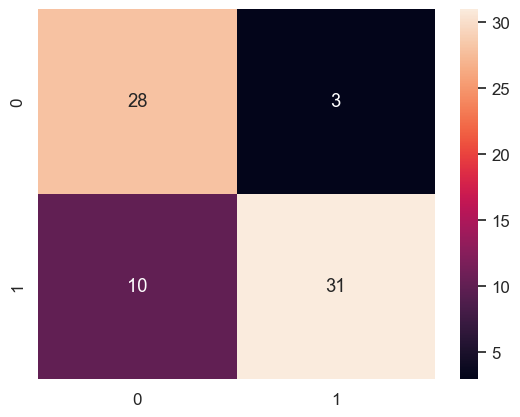

In [203]:
cm = confusion_matrix(y_test,y_pred_xgb)
ax = plt.subplot()
sns.heatmap(cm,annot=True,ax = ax)

In [204]:
results = pd.DataFrame(columns =['accuracy_score', 'F1 score'], index = ['Support Vector Classification', 'Random Forest Classifier','Decision tree' ,'KNN' ,'Xgboost'])

In [205]:
results.loc['Support Vector Classification'] = [accuracy_score(y_test, y_pred_svc), round(f1_score(y_test, y_pred_svc), 2)]
results.loc['Random Forest Classifier'] = [accuracy_score(y_test, y_pred_rfc), round(f1_score(y_test, y_pred_rfc), 2)]
results.loc['Decision tree'] = [accuracy_score(y_test, y_pred_DT), round(f1_score(y_test, y_pred_DT), 2)]
results.loc['KNN'] = [accuracy_score(y_test, y_pred_KNN), round(f1_score(y_test, y_pred_KNN), 2)]
results.loc['Xgboost'] = [accuracy_score(y_test, y_pred_xgb), round(f1_score(y_test, y_pred_xgb), 2)]

In [206]:
results

accuracy_score F1 score
Support Vector Classification           0.75      0.8
Random Forest Classifier            0.847222     0.86
Decision tree                       0.763889     0.76
KNN                                 0.694444     0.71
Xgboost                             0.819444     0.83